# K Nearest Neighboors - KNN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
colunms_name = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Species"]

In [4]:
df_iris = pd.read_csv(url,header=None,names=colunms_name)

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Dividindo dados em treino e teste

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_iris.drop('Species',axis = 1),df_iris['Species'],test_size=0.3)# 70% sera o conjunto de treino e 0.3 (30%) sera da variavel de teste

__Verificando a forma dos dados__

In [6]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [7]:
y_train.shape,y_test.shape

((105,), (45,))

__Instanciando o algoritmo KNN__

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

__Treinando algoritmo__

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

__Executando o KNN com o conjunto de teste__

In [10]:
resultado = knn.predict(X_test)
resultado

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

__executando novas amostragem__

In [11]:
test = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(test),knn.predict_proba(test)

(array(['Iris-setosa'], dtype=object), array([[1., 0., 0.]]))

__Tecnica de validação__

Matriz de confusão

In [12]:
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['      Predito'],margins=True))

      Predito    Iris-setosa  Iris-versicolor  Iris-virginica  All
Real                                                              
Iris-setosa               17                0               0   17
Iris-versicolor            0               12               2   14
Iris-virginica             0                0              14   14
All                       17               12              16   45


Interpretando a matriz de confusão

De: 17 teste para Iris-setosa foram acertado 17

De: 14 teste para Iris-versicolor foram acertado 12 com 2 erro para Iris-virginica

De: 14 teste para Iris-virginica foram acertados 14

__Metricas de Classificação__

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado, target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [17]:
from sklearn import metrics
unique_species = df_iris['Species'].unique()
print(metrics.classification_report(y_test,resultado,target_names=unique_species))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# _Treinando com conjunto de dados de digito_

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

__Vizualizando valores de dados__

In [4]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

__Visualizando os valores de classes__

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

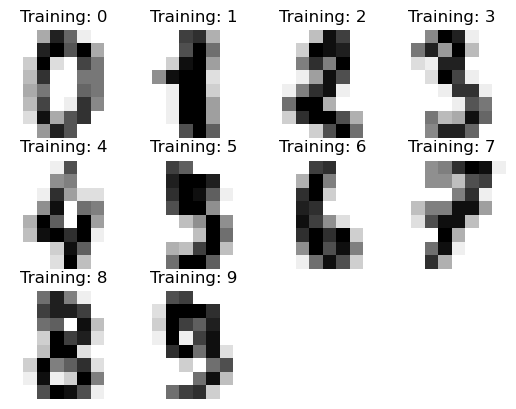

In [6]:
image_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(image_and_labels[:10]):
    plt.subplot(3,4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' %label)

Utilizando KNN

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)
 

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)#Criar o modelo knn


In [9]:
knn.fit(X_train,y_train)#Treinar o modelo

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test)

In [11]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.99      1.00      0.99        89
           2       0.99      1.00      0.99        83
           3       0.99      0.96      0.97        93
           4       0.99      1.00      0.99        93
           5       0.99      0.98      0.98        99
           6       1.00      1.00      1.00        98
           7       0.97      1.00      0.98        87
           8       0.98      0.98      0.98        83
           9       0.98      0.96      0.97        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



# Métricas por Classe
- Precision (Precisão):

    - Definição: A precisão é a proporção de verdadeiros positivos sobre o total de positivos preditos (verdadeiros positivos + falsos positivos).
    - Interpretação: Para a classe 0, a precisão é 1.00, o que significa que todas as previsões para a classe 0 foram corretas.
- Recall (Revocação):
    - Definição: A revocação é a proporção de verdadeiros positivos sobre o total de positivos reais (verdadeiros positivos + falsos negativos).
    - Interpretação: Para a classe 0, a revocação é 1.00, indicando que todos os exemplos reais da classe 0 foram corretamente identificados.
- F1-Score:
    - Definição: O F1-score é a média harmônica da precisão e da revocação. Ele fornece uma medida balanceada entre precisão e revocação.
    - Interpretação: Para a classe 0, o F1-score é 1.00, indicando um excelente equilíbrio entre precisão e revocação.
- Support (Suporte):
    - Definição: O suporte é o número de ocorrências reais da classe no conjunto de dados.
    - Interpretação: Para a classe 0, o suporte é 82, significando que há 82 exemplos reais da classe 0 no conjunto de dados.


# Métricas Globais

    - Accuracy (Acurácia):
        - Definição: A acurácia é a proporção de todas as previsões corretas sobre o total de previsões.
        - Interpretação: A acurácia é 0.99, indicando que 99% das previsões foram corretas.
    - Macro Avg (Média Macro):
        - Definição: A média macro é a média aritmética das métricas (precisão, revocação, F1-score) calculadas para cada classe individualmente.
        - Interpretação: A média macro para precisão, revocação e F1-score é 0.99, indicando um desempenho consistente em todas as classes.
    - Weighted Avg (Média Ponderada):
        - Definição: A média ponderada leva em conta o suporte (número de ocorrências) de cada classe ao calcular a média das métricas.
        - Interpretação: A média ponderada para precisão, revocação e F1-score é 0.99, refletindo o desempenho geral do modelo, ponderado pelo número de exemplos em cada classe.

In [12]:
image_and_predictions = list(zip(digits.images[len(X_train):],y_pred))

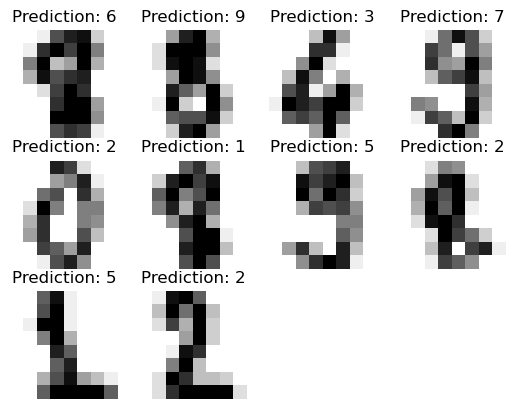

In [13]:
for index, (image, prediction) in enumerate(image_and_predictions[:10]):
    plt.subplot(3,4, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' %prediction)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(knn, digits.data, digits.target, cv=5)
print("Scores de cada fold:", scores)
print("Acurácia média:", scores.mean())


Scores de cada fold: [0.95555556 0.95833333 0.96657382 0.98607242 0.96657382]
Acurácia média: 0.966621788919839


__Otimizando o parametro K__

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np

# Carregar o conjunto de dados de dígitos
digits = datasets.load_digits()

# Lista para armazenar as acurácias médias
mean_scores = []

# Testar valores de k de 1 a 20
k_range = range(1, 31)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, digits.data, digits.target, cv=5)
    mean_scores.append(scores.mean())

# Encontrar o valor de k com a melhor acurácia média
best_k = k_range[np.argmax(mean_scores)]
print(f"Melhor valor de k: {best_k}")
print(f"Acurácia média: {max(mean_scores)}")


Melhor valor de k: 2
Acurácia média: 0.9671711544413494


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Carregar o conjunto de dados de dígitos
digits = datasets.load_digits()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

# Definir o modelo KNN
knn = KNeighborsClassifier()

# Definir o espaço de busca para o hiperparâmetro k
param_grid = {'n_neighbors': range(1, 21)}

# Configurar o GridSearch com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Treinar o GridSearch
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhor valor de k: {grid_search.best_params_['n_neighbors']}")
print(f"Melhor acurácia: {grid_search.best_score_}")

# Avaliar o modelo no conjunto de teste
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


Melhor valor de k: 1
Melhor acurácia: 0.9799441340782122
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        89
           2       1.00      0.99      0.99        83
           3       0.98      0.97      0.97        93
           4       0.99      0.99      0.99        93
           5       1.00      0.98      0.99        99
           6       1.00      1.00      1.00        98
           7       0.98      0.99      0.98        87
           8       0.96      0.96      0.96        83
           9       0.97      0.96      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



# Diferenças Principais
- Método de Otimização:
    - Código Anterior: Utiliza um loop manual para testar diferentes valores de ( k ) e calcular a acurácia média usando validação cruzada.
    - Código Atual: Utiliza GridSearchCV, que automatiza o processo de busca dos melhores hiperparâmetros, testando todas as combinações possíveis definidas no param_grid.
- Divisão dos Dados:
    - Código Anterior: Não divide explicitamente os dados em treino e teste antes da validação cruzada.
    - Código Atual: Divide os dados em conjuntos de treino e teste antes de aplicar o GridSearchCV.
- Automatização:
    - Código Anterior: Requer mais código manual para iterar sobre os valores de ( k ) e calcular as acurácias médias.
    - Código Atual: GridSearchCV automatiza a busca e a validação cruzada, tornando o código mais conciso e fácil de manter.
- Avaliação Final:
    - Código Anterior: Apenas encontra o melhor valor de ( k ) e imprime a acurácia média.
    - Código Atual: Além de encontrar o melhor valor de ( k ), também treina o modelo final com os melhores hiperparâmetros e avalia sua performance no conjunto de teste.

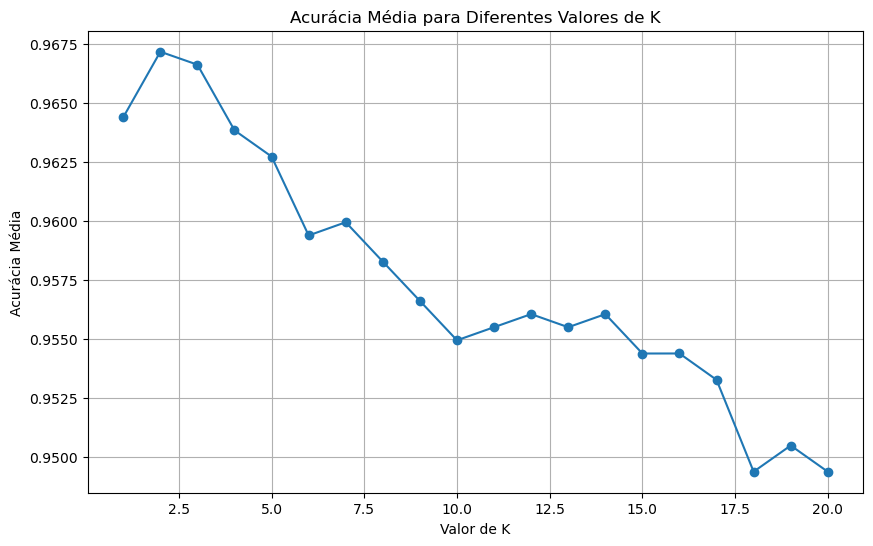

Melhor valor de k: 2
Acurácia média: 0.9671711544413494


In [18]:
mean_scores = []

# Testar valores de k de 1 a 20
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, digits.data, digits.target, cv=5)
    mean_scores.append(scores.mean())

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para Diferentes Valores de K')
plt.grid(True)
plt.show()

# Encontrar o melhor valor de k
best_k = k_range[np.argmax(mean_scores)]
print(f"Melhor valor de k: {best_k}")
print(f"Acurácia média: {max(mean_scores)}")

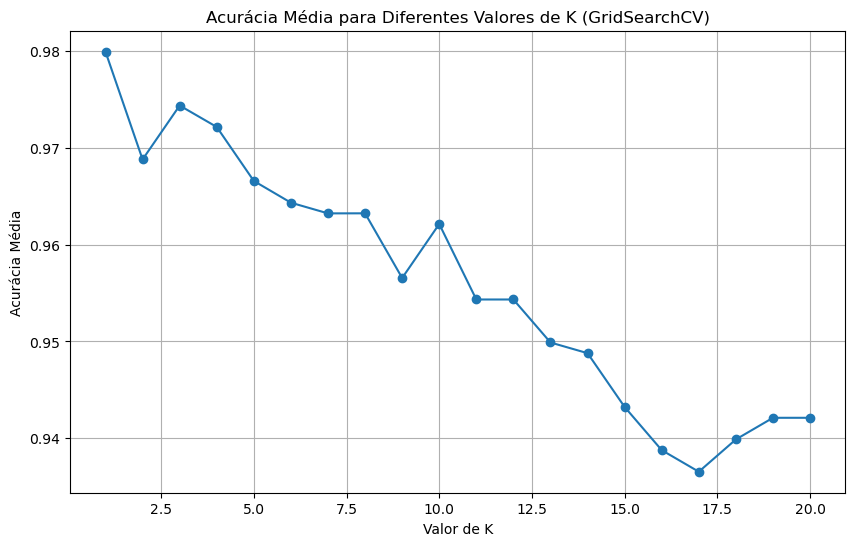

Melhor valor de k: 1
Melhor acurácia: 0.9799441340782122


In [19]:
results = grid_search.cv_results_

# Obter os valores de k e as acurácias médias
k_values = param_grid['n_neighbors']
mean_scores = results['mean_test_score']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para Diferentes Valores de K (GridSearchCV)')
plt.grid(True)
plt.show()

# Exibir o melhor valor de k
print(f"Melhor valor de k: {grid_search.best_params_['n_neighbors']}")
print(f"Melhor acurácia: {grid_search.best_score_}")

c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\Guilherme\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind

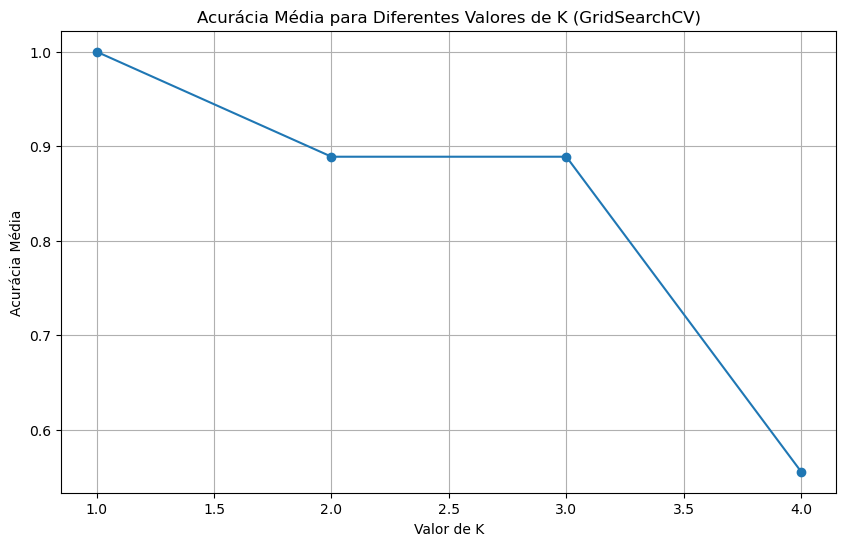

Melhor valor de k: 1
Melhor acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame com os dados dos funcionários
# df = pd.read_csv('dados_funcionarios.csv')

# Para este exemplo, vamos criar um DataFrame fictício
data = {
    'idade': [25, 45, 35, 50, 23, 34, 44, 36, 29, 40],
    'tempo_empresa': [1, 10, 5, 20, 2, 6, 15, 7, 3, 12],
    'salario': [3000, 8000, 5000, 12000, 3200, 5400, 9000, 6000, 3500, 7500],
    'avaliacao': [3, 4, 3, 5, 2, 3, 4, 3, 2, 4],
    'rotatividade': [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Dividir os dados em características (X) e rótulo (y)
X = df.drop('rotatividade', axis=1)
y = df['rotatividade']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir o modelo KNN
knn = KNeighborsClassifier()

# Definir o espaço de busca para o hiperparâmetro k
param_grid = {'n_neighbors': range(1, 21)}

# Configurar o GridSearch com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=3)

# Treinar o GridSearch
grid_search.fit(X_train, y_train)

# Extrair os resultados da validação cruzada
results = grid_search.cv_results_

# Obter os valores de k e as acurácias médias
k_values = param_grid['n_neighbors']
mean_scores = results['mean_test_score']

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média para Diferentes Valores de K (GridSearchCV)')
plt.grid(True)
plt.show()

# Exibir o melhor valor de k
print(f"Melhor valor de k: {grid_search.best_params_['n_neighbors']}")
print(f"Melhor acurácia: {grid_search.best_score_}")

# Avaliar o modelo no conjunto de teste
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))
